<a href="https://colab.research.google.com/github/Pranavla/Customer_churn/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraries and Dataset

In [11]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# **Data-preprocessing**

In [12]:
df.shape

(7043, 21)

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
df.drop(['customerID'],axis=1, inplace=True)

In [17]:
categories=[i for i in df.columns if df[i].dtype=='O']
categories

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

# **Data Visualization**

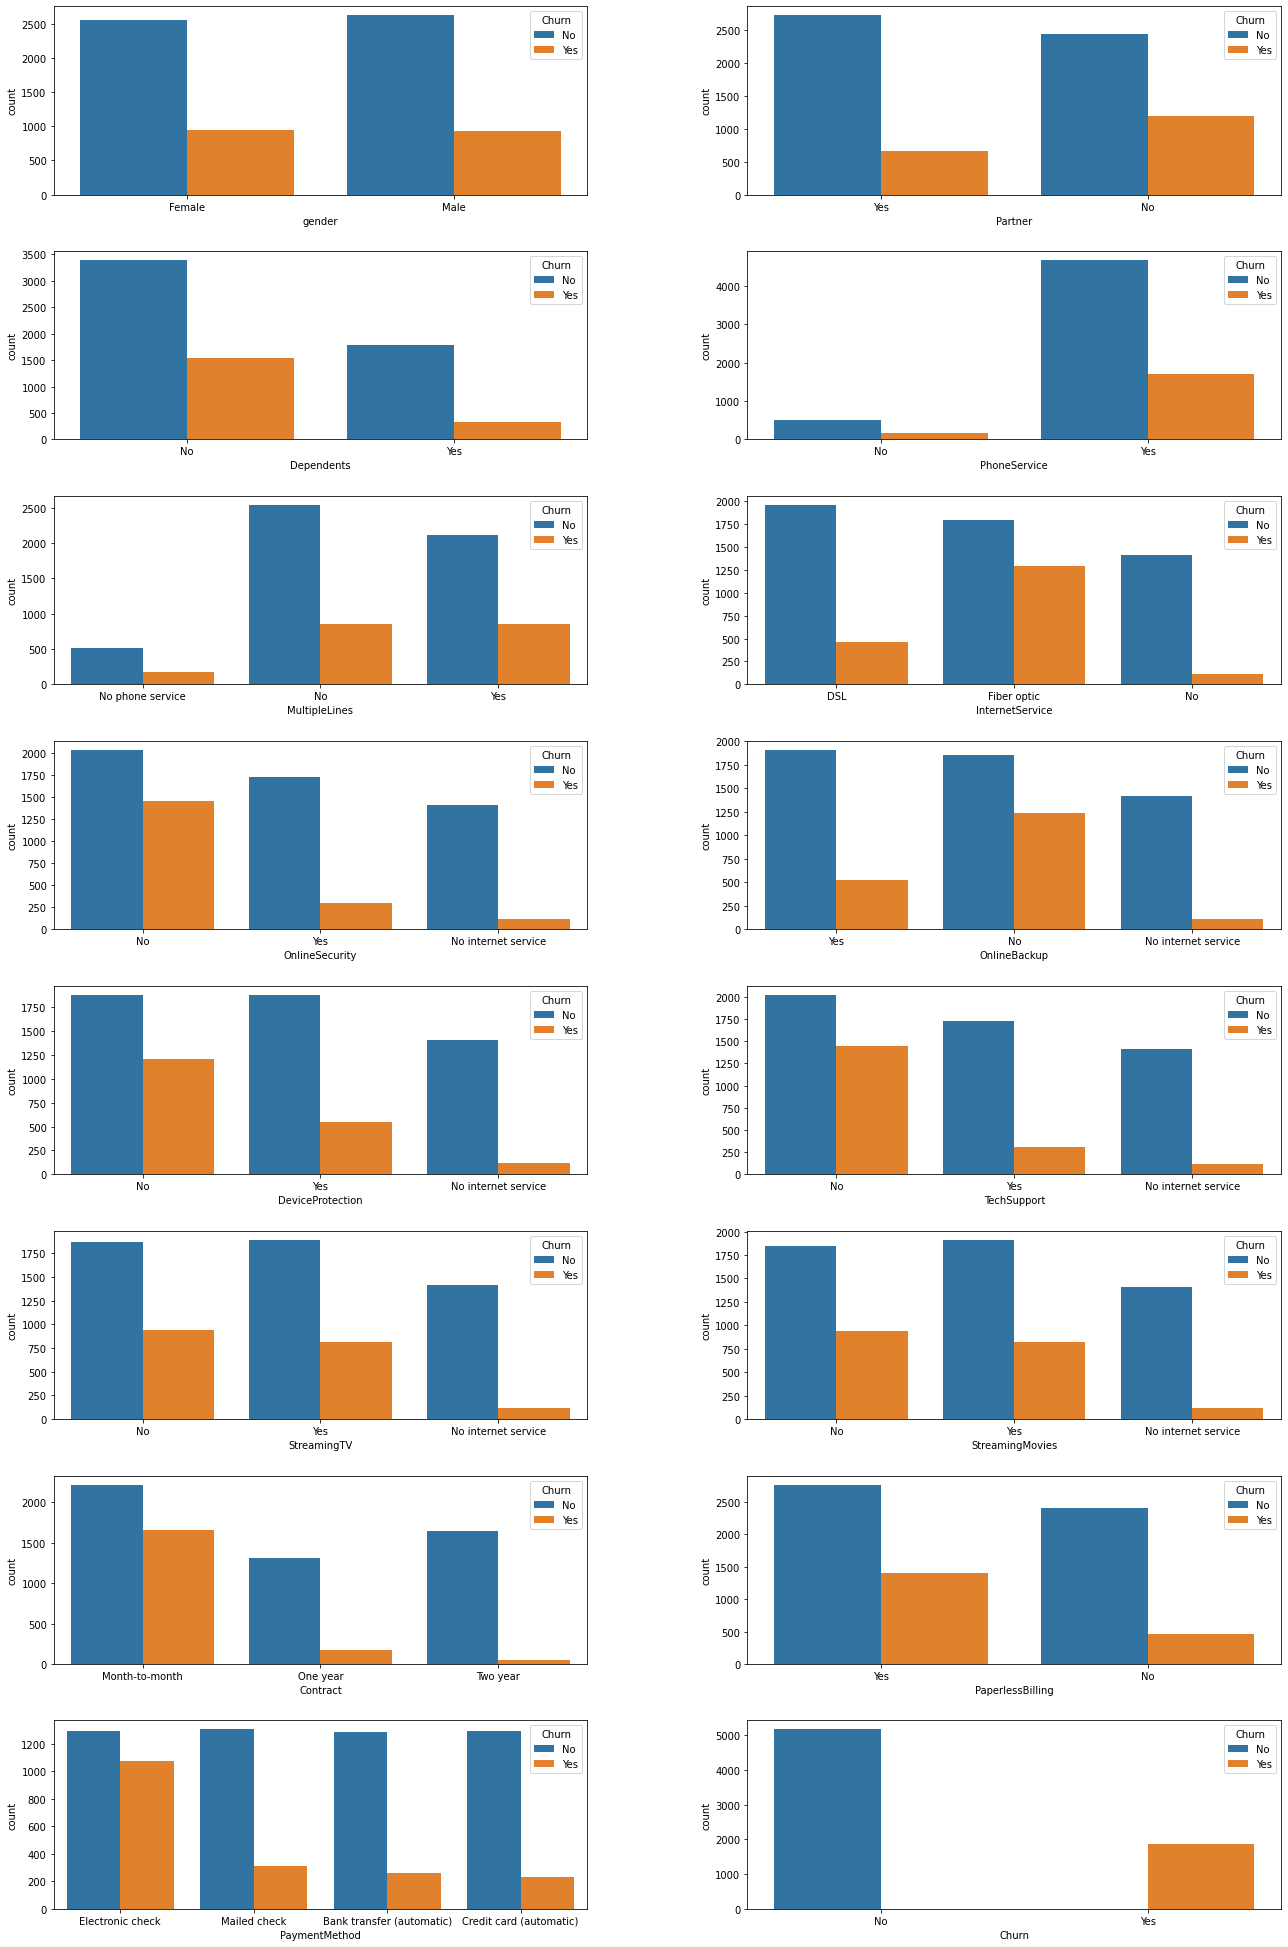

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(22,35))
for i,j in enumerate(categories,start=1):
  plt.subplots_adjust(wspace=0.3,hspace=.3)
  plt.subplot(8,2,i)
  sns.countplot(data=df,x=j,hue='Churn')

In [19]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

The number of 'yes' and 'no' are not equal

In [20]:
count=pd.DataFrame(df['Churn'].value_counts(normalize=True)*100)
count.reset_index(inplace=True)
count.rename(columns={'index':'Churn','Churn':'Percentage'},inplace=True)
count

,Churn,Percentage
0,No,73.463013
1,Yes,26.536987


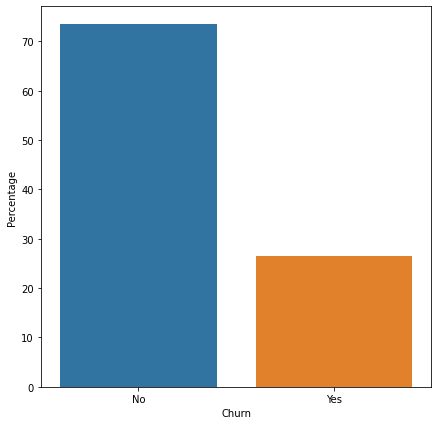

In [21]:
plt.figure(figsize=(7,7))
bar=sns.barplot(data=count,x='Churn',y='Percentage')
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
columns=['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
for i in df[columns]:
  df[i]=encoder.fit_transform(df[i])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,1


# Sepating X(input) and y(results)

In [42]:
X=df.iloc[:,:-1].values
X

array([[  0.  ,   0.  ,   1.  , ...,   1.  ,   2.  ,  29.85],
       [  1.  ,   0.  ,   0.  , ...,   0.  ,   3.  ,  56.95],
       [  1.  ,   0.  ,   0.  , ...,   1.  ,   3.  ,  53.85],
       ...,
       [  0.  ,   0.  ,   1.  , ...,   1.  ,   2.  ,  29.6 ],
       [  1.  ,   1.  ,   1.  , ...,   1.  ,   3.  ,  74.4 ],
       [  1.  ,   0.  ,   0.  , ...,   1.  ,   0.  , 105.65]])

In [43]:
y=df.iloc[:,-1].values

# **Coverting data into traing and testing dataset**

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

# **Normalising the data**
here we are using standardscalar for normalizing

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
X_test

array([[-1.00569573, -0.43979045, -0.9528351 , ...,  0.82758326,
        -1.48618812,  0.4998851 ],
       [-1.00569573,  2.27381019, -0.9528351 , ...,  0.82758326,
        -1.48618812,  1.2484435 ],
       [-1.00569573, -0.43979045, -0.9528351 , ...,  0.82758326,
        -1.48618812, -0.65697789],
       ...,
       [ 0.99433652,  2.27381019, -0.9528351 , ...,  0.82758326,
        -1.48618812,  1.06254873],
       [-1.00569573, -0.43979045,  1.04949954, ...,  0.82758326,
        -1.48618812, -0.21215826],
       [-1.00569573, -0.43979045, -0.9528351 , ..., -1.20833764,
         1.33366079,  0.29075348]])

# Prediction using KNN Algorithm

In [27]:
from sklearn.neighbors import KNeighborsClassifier
cls=KNeighborsClassifier()
cls.fit(X_train,y_train)
y_pred=cls.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1585
           1       0.51      0.54      0.52       528

    accuracy                           0.76      2113
   macro avg       0.68      0.68      0.68      2113
weighted avg       0.76      0.76      0.76      2113



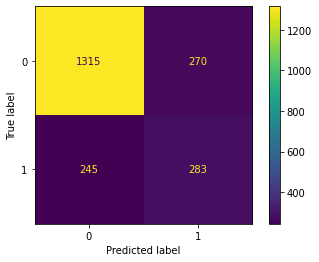

In [28]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

# Prediction using Naive bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(X_train,y_train)
y_predNB=NB.predict(X_test) 
y_predNB

array([0, 0, 1, ..., 1, 0, 0])

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1585
           1       0.52      0.77      0.62       528

    accuracy                           0.76      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.81      0.76      0.78      2113



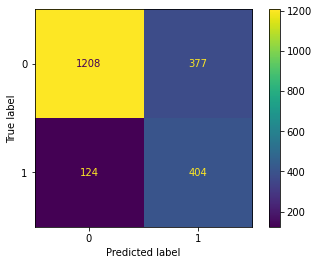

In [30]:
print(classification_report(y_test,y_predNB))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_predNB))

# Prediction using SVM

In [31]:
from sklearn.svm import SVC
sc=SVC()
sc.fit(X_train,y_train)
y_pred_svm=sc.predict(X_test)
y_pred_svm

array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1585
           1       0.65      0.52      0.57       528

    accuracy                           0.81      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.80      0.81      0.80      2113



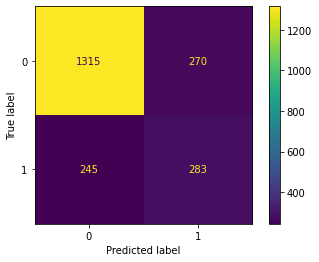

In [32]:
print(classification_report(y_test,y_pred_svm))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

# Prediction using Decision tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier()
dec.fit(X_train,y_train)
y_pred_dec=dec.predict(X_test)
y_pred_dec

array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1585
           1       0.47      0.54      0.50       528

    accuracy                           0.73      2113
   macro avg       0.65      0.67      0.66      2113
weighted avg       0.74      0.73      0.74      2113



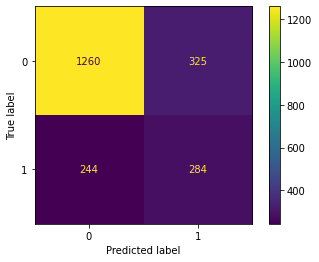

In [34]:
print(classification_report(y_test,y_pred_dec))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dec))

# On using different algorithms **'SVM'** is having highest accuracy score

In [35]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

Here we can understand that the number of '0's and '1' are not equal.So, we need to balance the number of both

# **Balancing** using SMOTE

In [36]:
X_new=df.iloc[:,:-1].values
y_new=df.iloc[:,-1].values
y_new

array([0, 0, 1, ..., 0, 1, 0])

In [37]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
Xo,yo=oversample.fit_resample(X_new,y_new)

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Xo,yo,test_size=0.3, random_state=1)
y_test

array([1, 0, 0, ..., 1, 1, 0])

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
X_test

array([[-1.05170613, -0.51643571, -0.92487163, ..., -0.62954197,
         0.36189558, -1.50200957],
       [ 1.04421724, -0.51643571, -0.92487163, ...,  0.76526716,
         1.38106386,  0.44175145],
       [ 1.04421724, -0.51643571, -0.92487163, ...,  0.76526716,
         0.36189558,  0.42428249],
       ...,
       [-1.05170613,  2.16658307,  1.17070001, ...,  0.76526716,
         0.36189558,  0.89419735],
       [ 1.04421724, -0.51643571, -0.92487163, ...,  0.76526716,
        -0.35933104, -0.45456787],
       [ 1.04421724,  2.16658307, -0.92487163, ...,  0.76526716,
         0.36189558, -0.46838104]])

# Prediction of balanced dataset using **'SVM'** algorithm

In [40]:
from sklearn.svm import SVC
scb=SVC()
scb.fit(X_train,y_train)
y_pred_b=scb.predict(X_test)
y_pred_b

array([1, 0, 1, ..., 1, 1, 0])

SVM

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1582
           1       0.80      0.82      0.81      1523

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



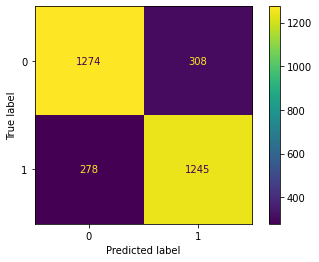

In [41]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred_b))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_b))